In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def as_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def as_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

This notebook is about recognizing shapes based on parameters like their total area or "convexity"

In [2]:
def contours(binary_img, min_area=15):
    contour_list, _ = cv2.findContours(
        binary_img,
        mode=cv2.RETR_EXTERNAL,
        method=cv2.CHAIN_APPROX_SIMPLE)
    return [x for x in contour_list if (cv2.contourArea(x) >= min_area)]

In [3]:
def convex_hulls(points_list):
    return [cv2.convexHull(x) for x in points_list]

In [61]:
def draw(img, contour_list, hull_list):
    width = img.shape[0]
    height = img.shape[1]
    output_img = np.copy(img)
    ct_only = np.zeros_like(img)
    for contour, hull in zip(contour_list, hull_list):
        cv2.drawContours(ct_only, contour, -1, color = (255, 255, 255), thickness = 2)

        rect = cv2.minAreaRect(contour)
        center, size, angle = rect
        center = tuple([int(dim) for dim in center]) # Convert to int so we can draw
        box = cv2.boxPoints(rect).astype(int)
        box_area = size[0] * size[1] # Area of the rotated bounding box

        # Draw rectangle and circle
        cv2.drawContours(output_img, [box], -1, color = (0, 0, 255), thickness = 2)
        cv2.circle(output_img, center = center, radius = 3, color = (0, 0, 255), thickness = -1)
        
        # Ratio between the convex hull and original contour area
        hull_area_ratio = cv2.contourArea(contour) / cv2.contourArea(hull)
        box_area_ratio = cv2.contourArea(contour) / box_area
        cv2.putText(output_img,
                    'h:{:.2f}, b:{:.2f}'.format(hull_area_ratio, box_area_ratio),
                    box[0],
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.35,
                    (255,0,0),
                    1)
    
    return output_img, ct_only

In [62]:
blobimg = cv2.imread('BlobTest.jpg')[:, :425]
edges = cv2.Canny(as_gray(blobimg), 100, 200)

In [63]:
ctrs = contours(edges, 1)
hulls = convex_hulls(ctrs)

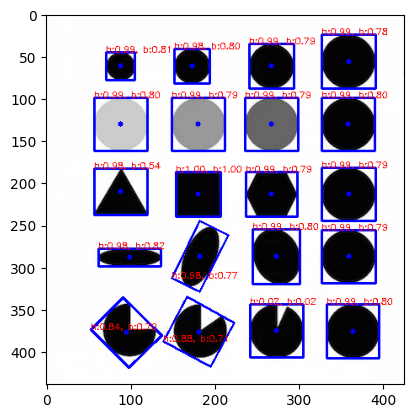

In [70]:
plt.imshow(draw(blobimg, ctrs, hulls)[0], cmap='gray')